In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# y, sr = librosa.load("/home/satvikaryan/design_assignment/wav/dash_1.wav")
audio_data = "/home/satvikaryan/birdy/wav/dash_1.wav"
ipd.Audio(audio_data)

In [3]:
audio, sample_rate = librosa.load(audio_data)

In [4]:
frameSize = 2048
hopSize = 512

In [5]:
stft_audio = librosa.stft(audio, n_fft = frameSize, hop_length = hopSize)

In [6]:
stft_audio.shape

(1025, 99)

In [7]:
y_audio = np.abs(stft_audio) ** 2
y_audio.shape

(1025, 99)

In [8]:
def plot_spectrogram(y, sr, hop_length, y_axis = "linear"):
    plt.figure(figsize = (25,10))
    librosa.display.specshow(y, sr = sr, hop_length = hop_length, x_axis = "time", y_axis = y_axis)
    plt.colorbar(format="%+2.f")

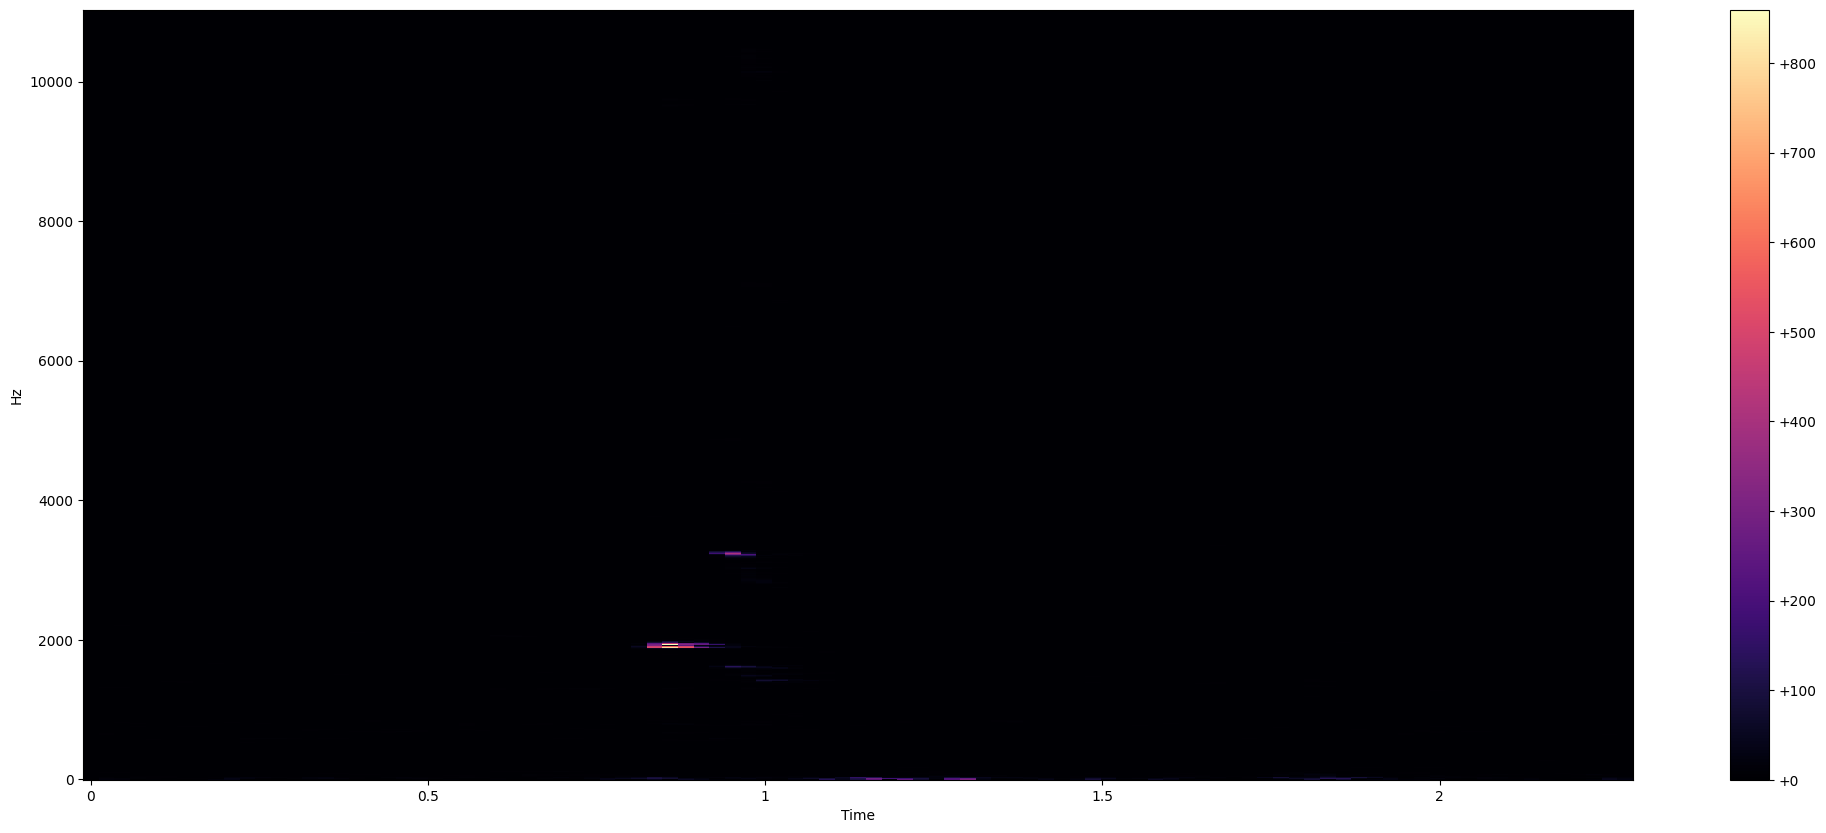

In [9]:
plot_spectrogram(y_audio, sample_rate, hopSize)

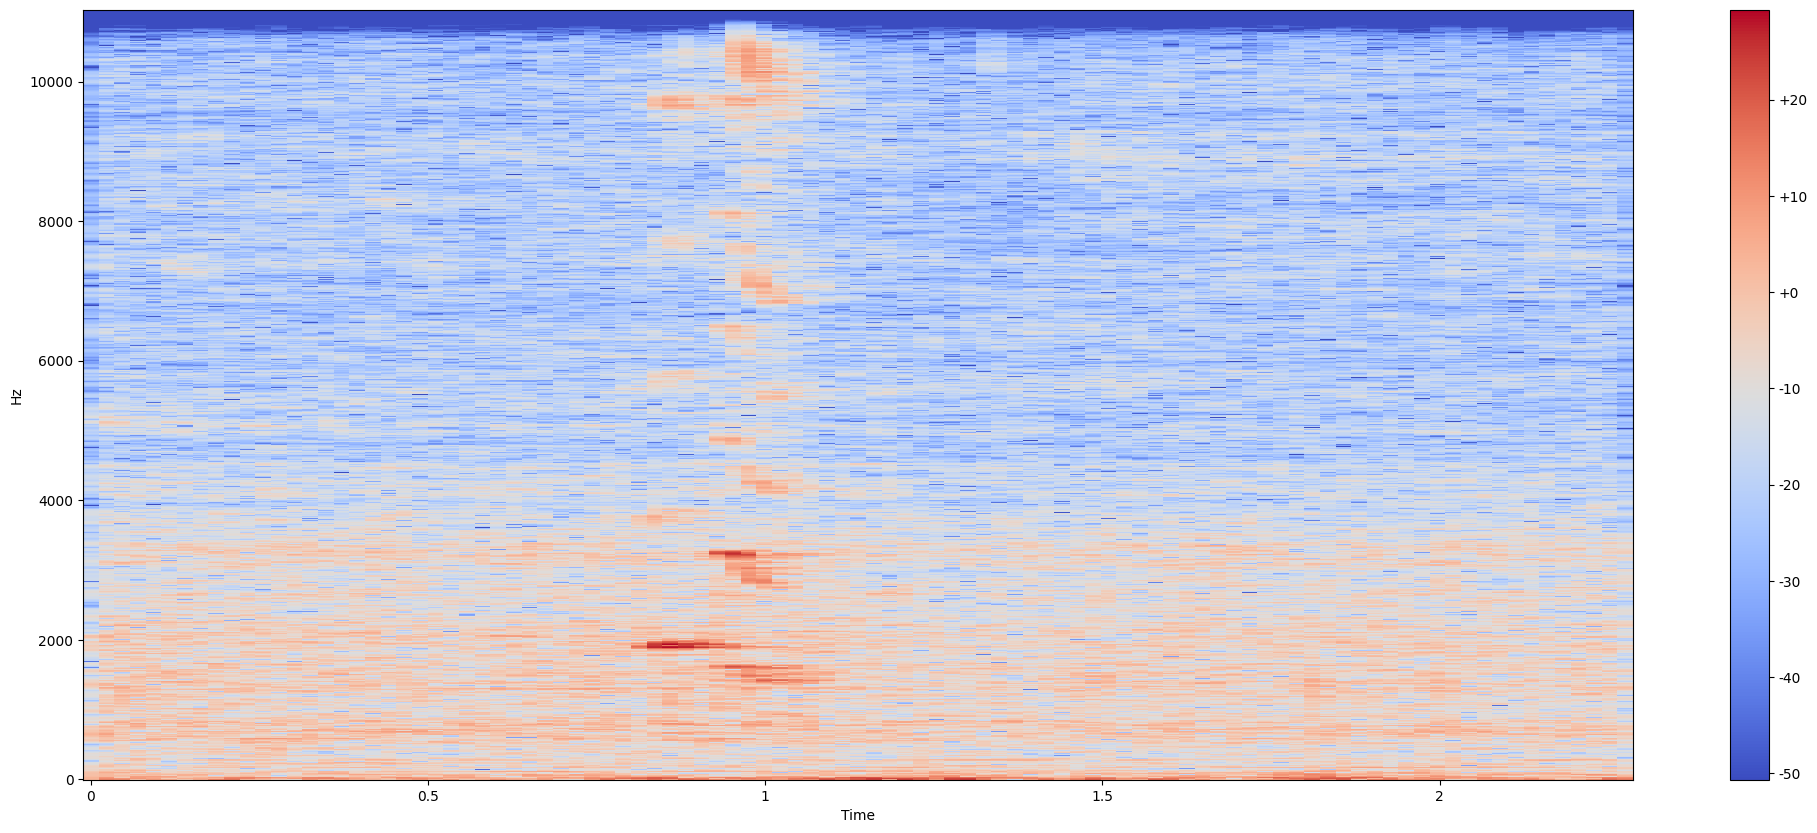

In [10]:
y_log_audio = librosa.power_to_db(y_audio)
plot_spectrogram(y_log_audio, sample_rate, hopSize)

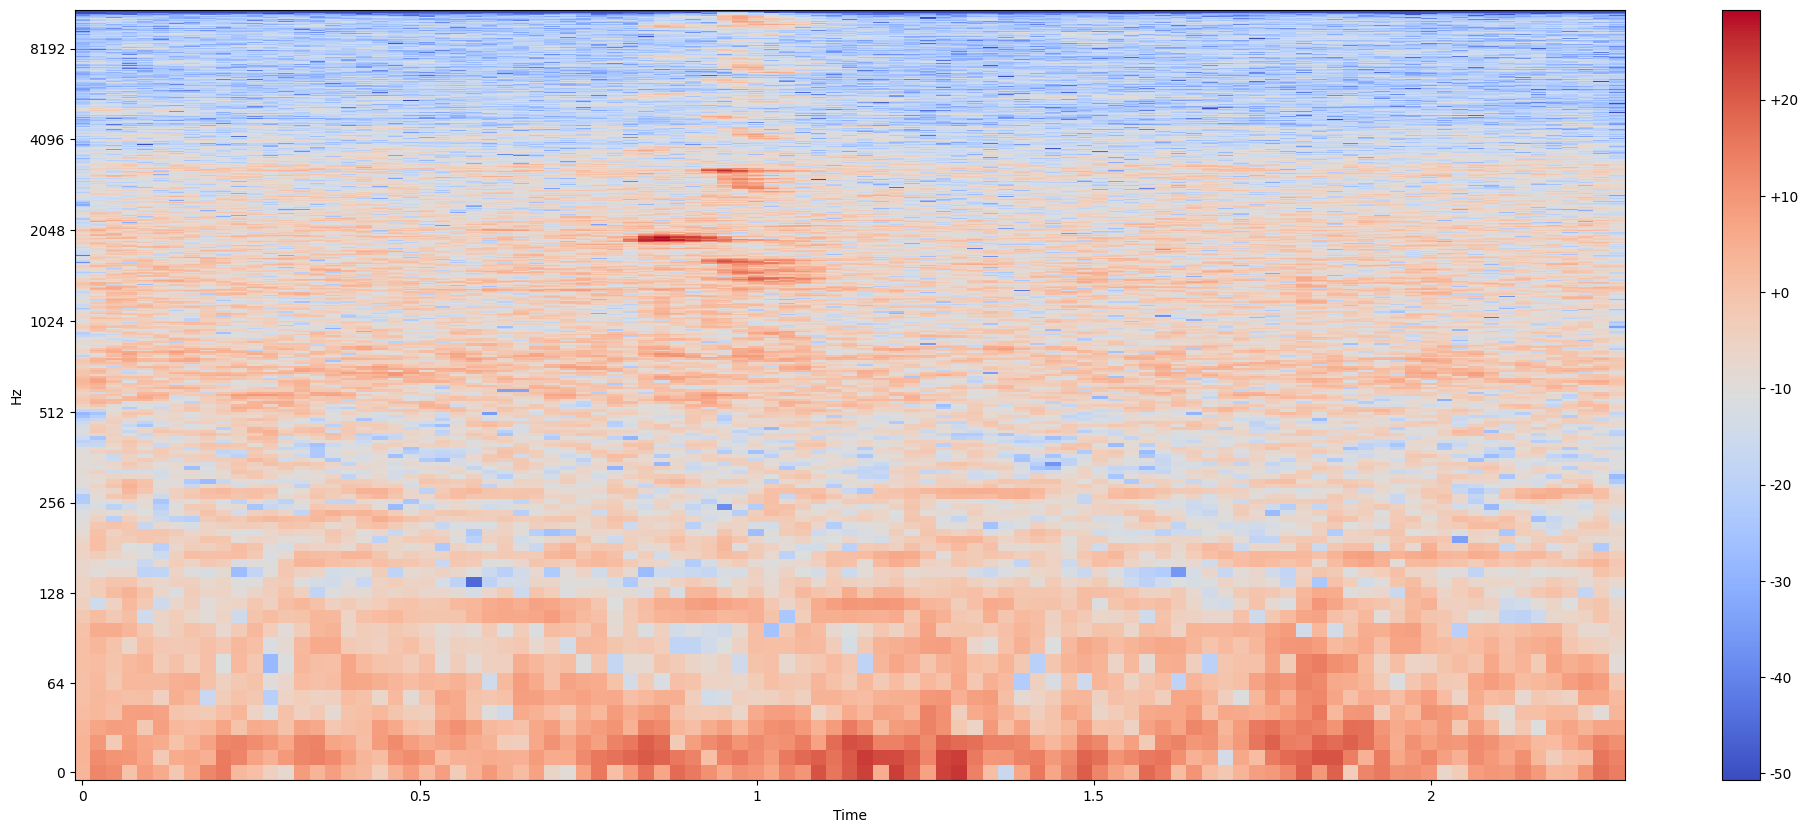

In [11]:
plot_spectrogram(y_log_audio, sample_rate, hopSize, y_axis = "log")

In [12]:
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)

In [13]:
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

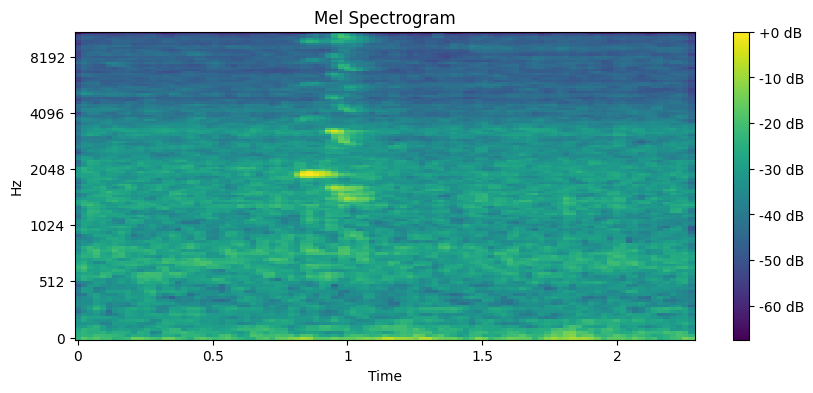

In [14]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()